In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
train=pd.read_csv("E:\machine hack\Glass Quality Prediction  Weekend Hackathon #6\Glass_Quality_Participants_Data\\Train.csv")

In [3]:
train

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,133,37,583,599,54808,55435,319,319.230467,0,0,0,0,0,1
1354,0,1,145,35,1169,1192,293279,293314,467,467.349309,0,0,0,0,0,2
1355,0,1,145,47,1197,1203,818707,818988,316,316.449571,0,0,0,1,0,1
1356,1,0,126,84,651,672,2162298,2162999,122,122.518578,0,0,0,0,0,2


In [4]:
train.isnull().any()

grade_A_Component_1    False
grade_A_Component_2    False
max_luminosity         False
thickness              False
xmin                   False
xmax                   False
ymin                   False
ymax                   False
pixel_area             False
log_area               False
x_component_1          False
x_component_2          False
x_component_3          False
x_component_4          False
x_component_5          False
class                  False
dtype: bool

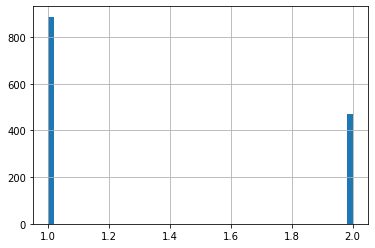

In [5]:
train['class'].hist(bins=50)

In [6]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

In [7]:
test=pd.read_csv("E:\machine hack\Glass Quality Prediction  Weekend Hackathon #6\Glass_Quality_Participants_Data\\Test.csv")

In [8]:
fdata=train.append(test,sort=False)
fdata.reset_index(inplace=True)

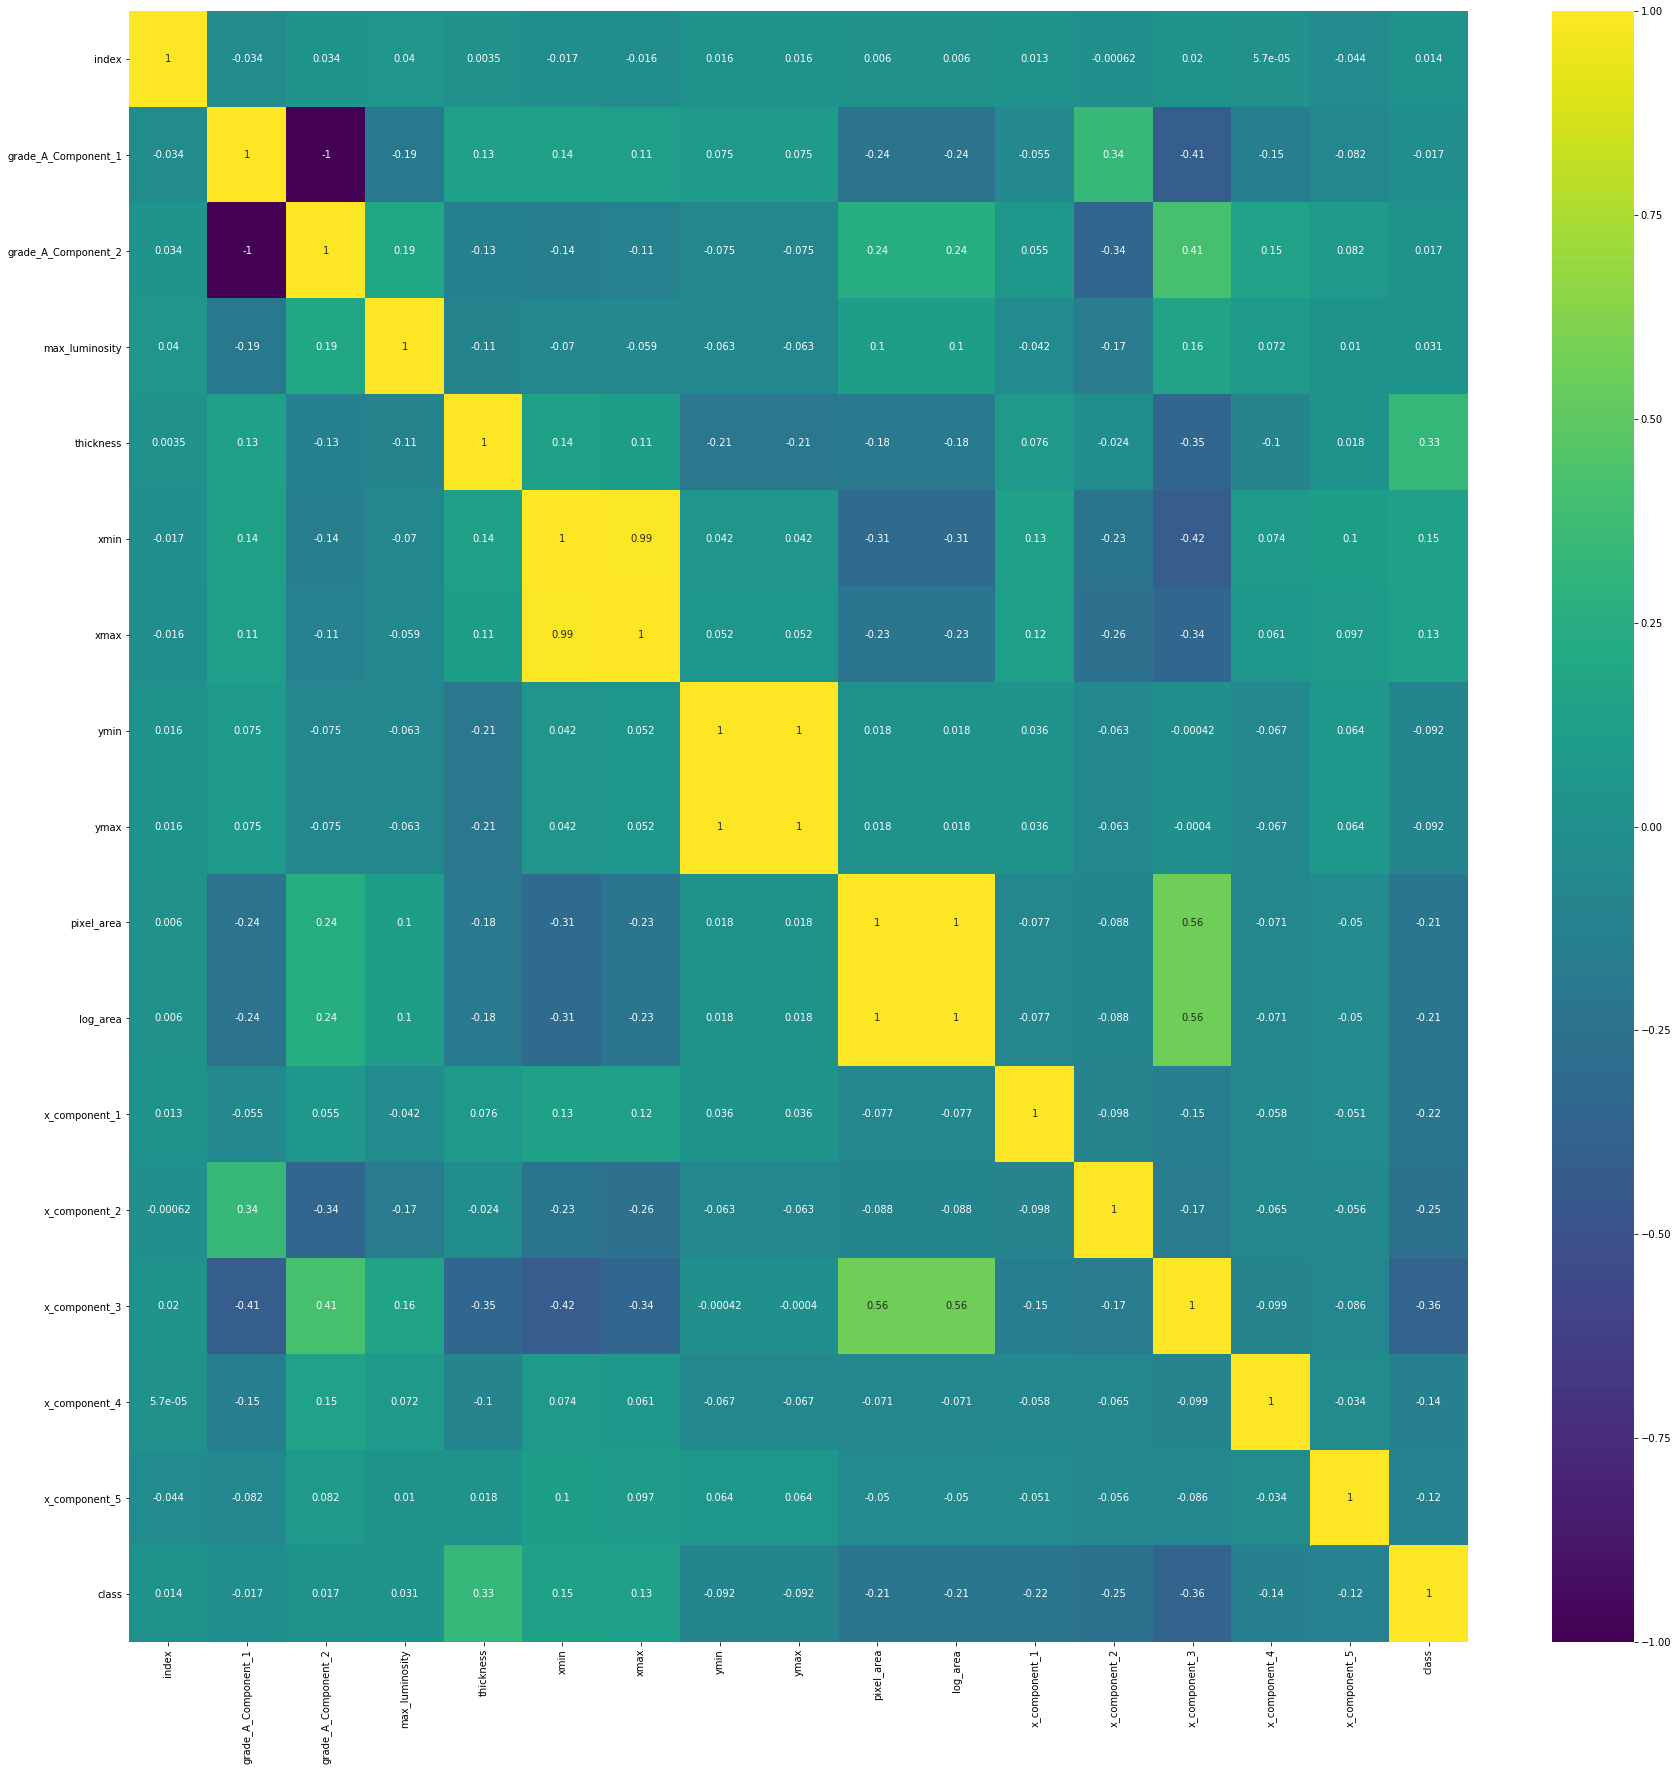

In [9]:
plt.figure(figsize = (30,30))
sns.heatmap(fdata.corr(),annot=True,cmap='viridis')

In [10]:
#	xmin	xmax	ymin	ymax	pixel_area	log_area  are highly correleated
fdata.drop(['xmax','ymax','log_area'],axis=1,inplace=True)

In [11]:
fdata.columns

Index(['index', 'grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'ymin', 'pixel_area', 'x_component_1',
       'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5',
       'class'],
      dtype='object')

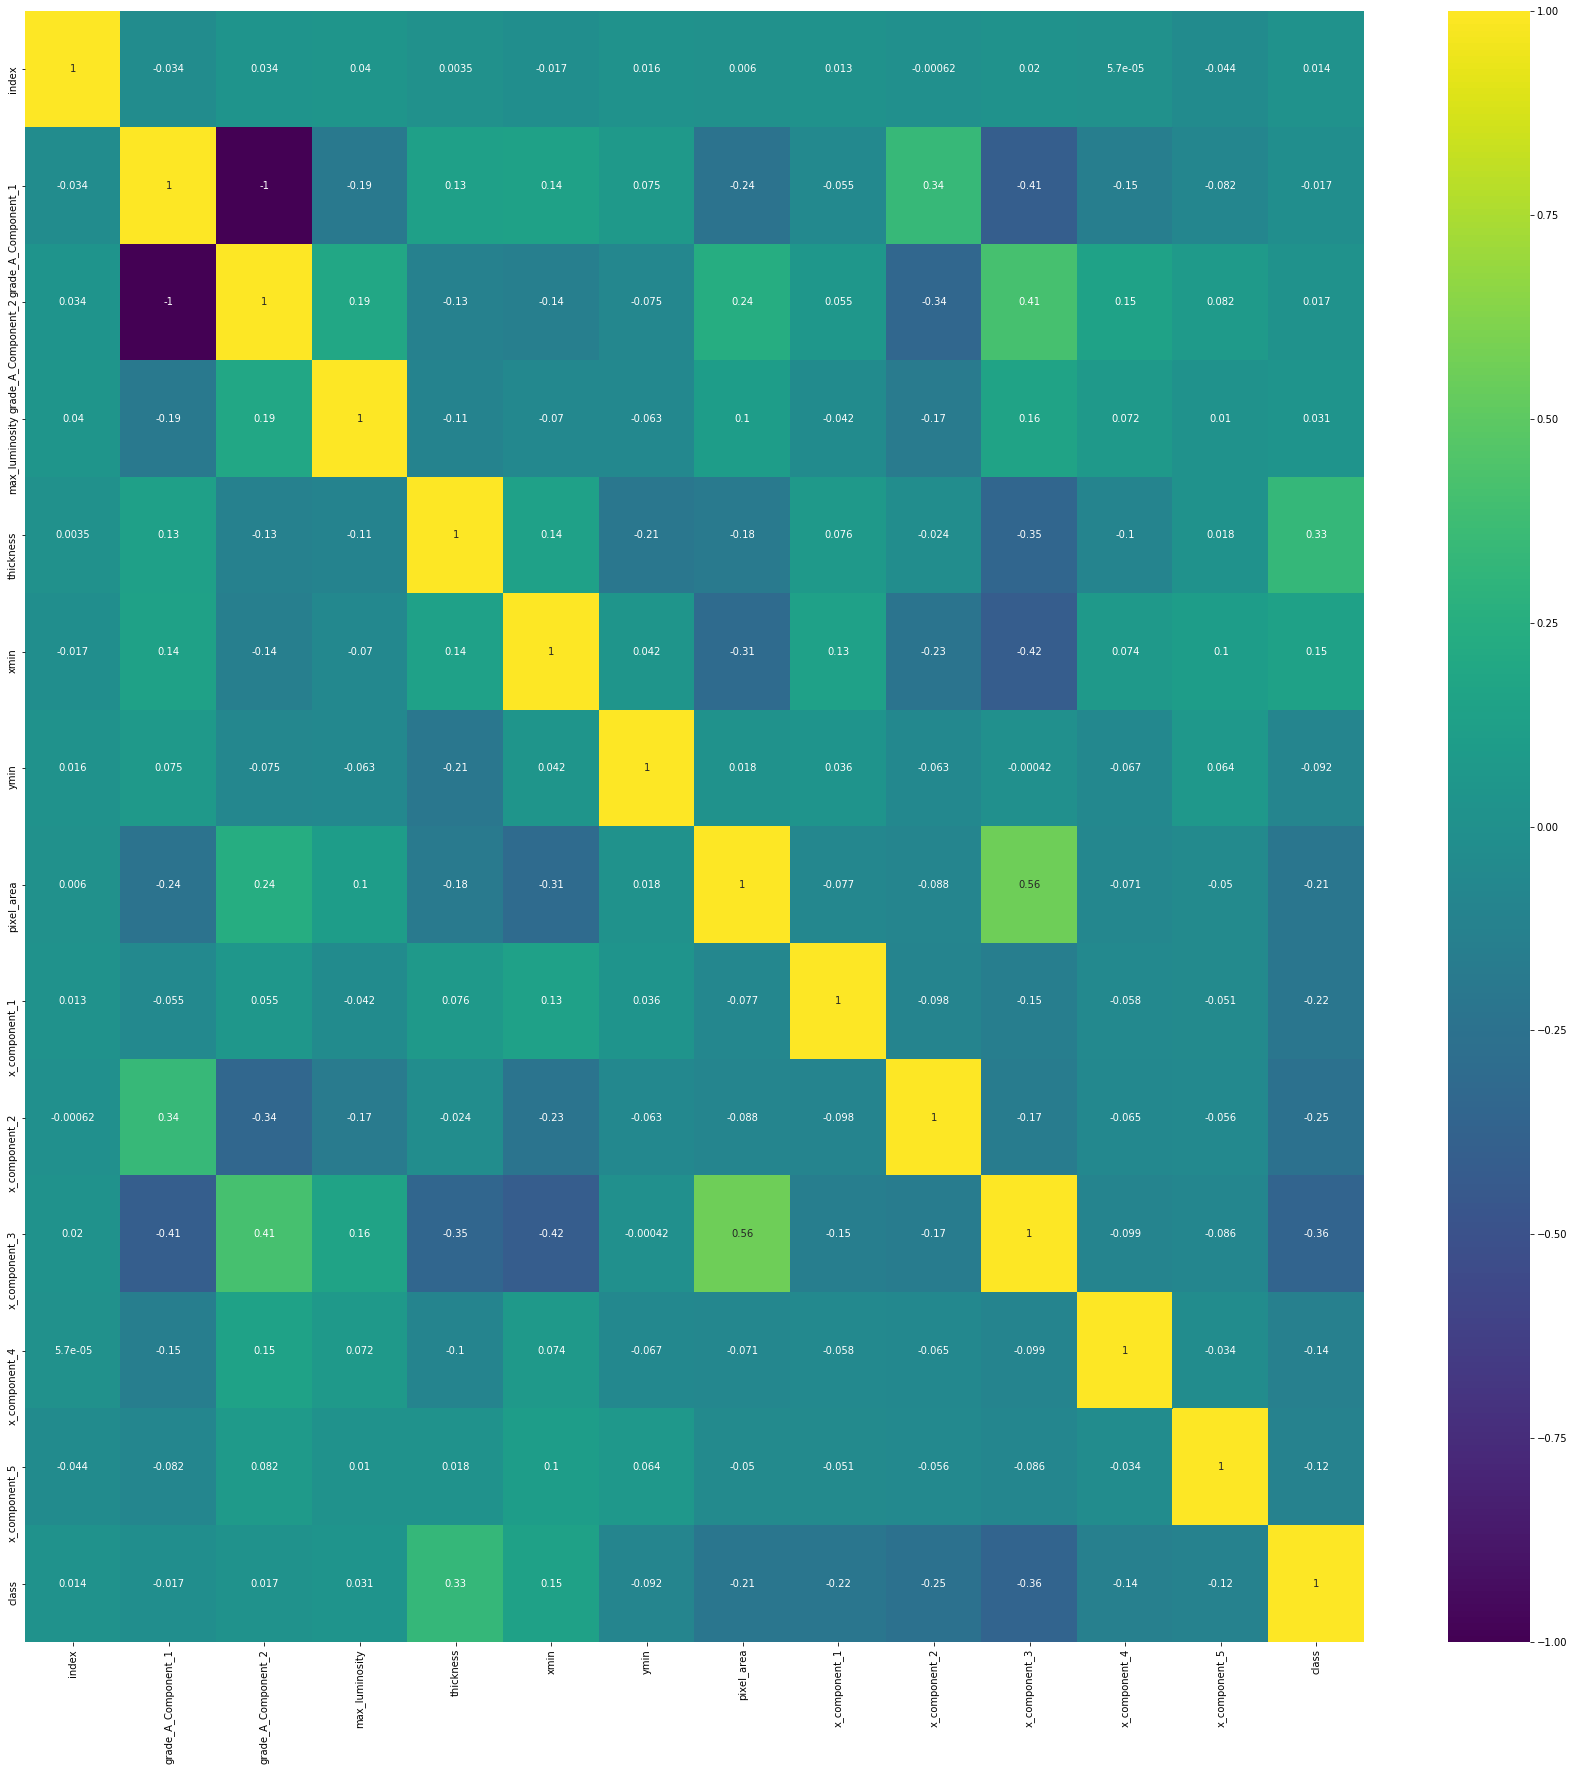

In [12]:
plt.figure(figsize = (30,30))
sns.heatmap(fdata.corr(),annot=True,cmap='viridis')

In [13]:
fdata.drop(['index','grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity'],axis=1,inplace=True)

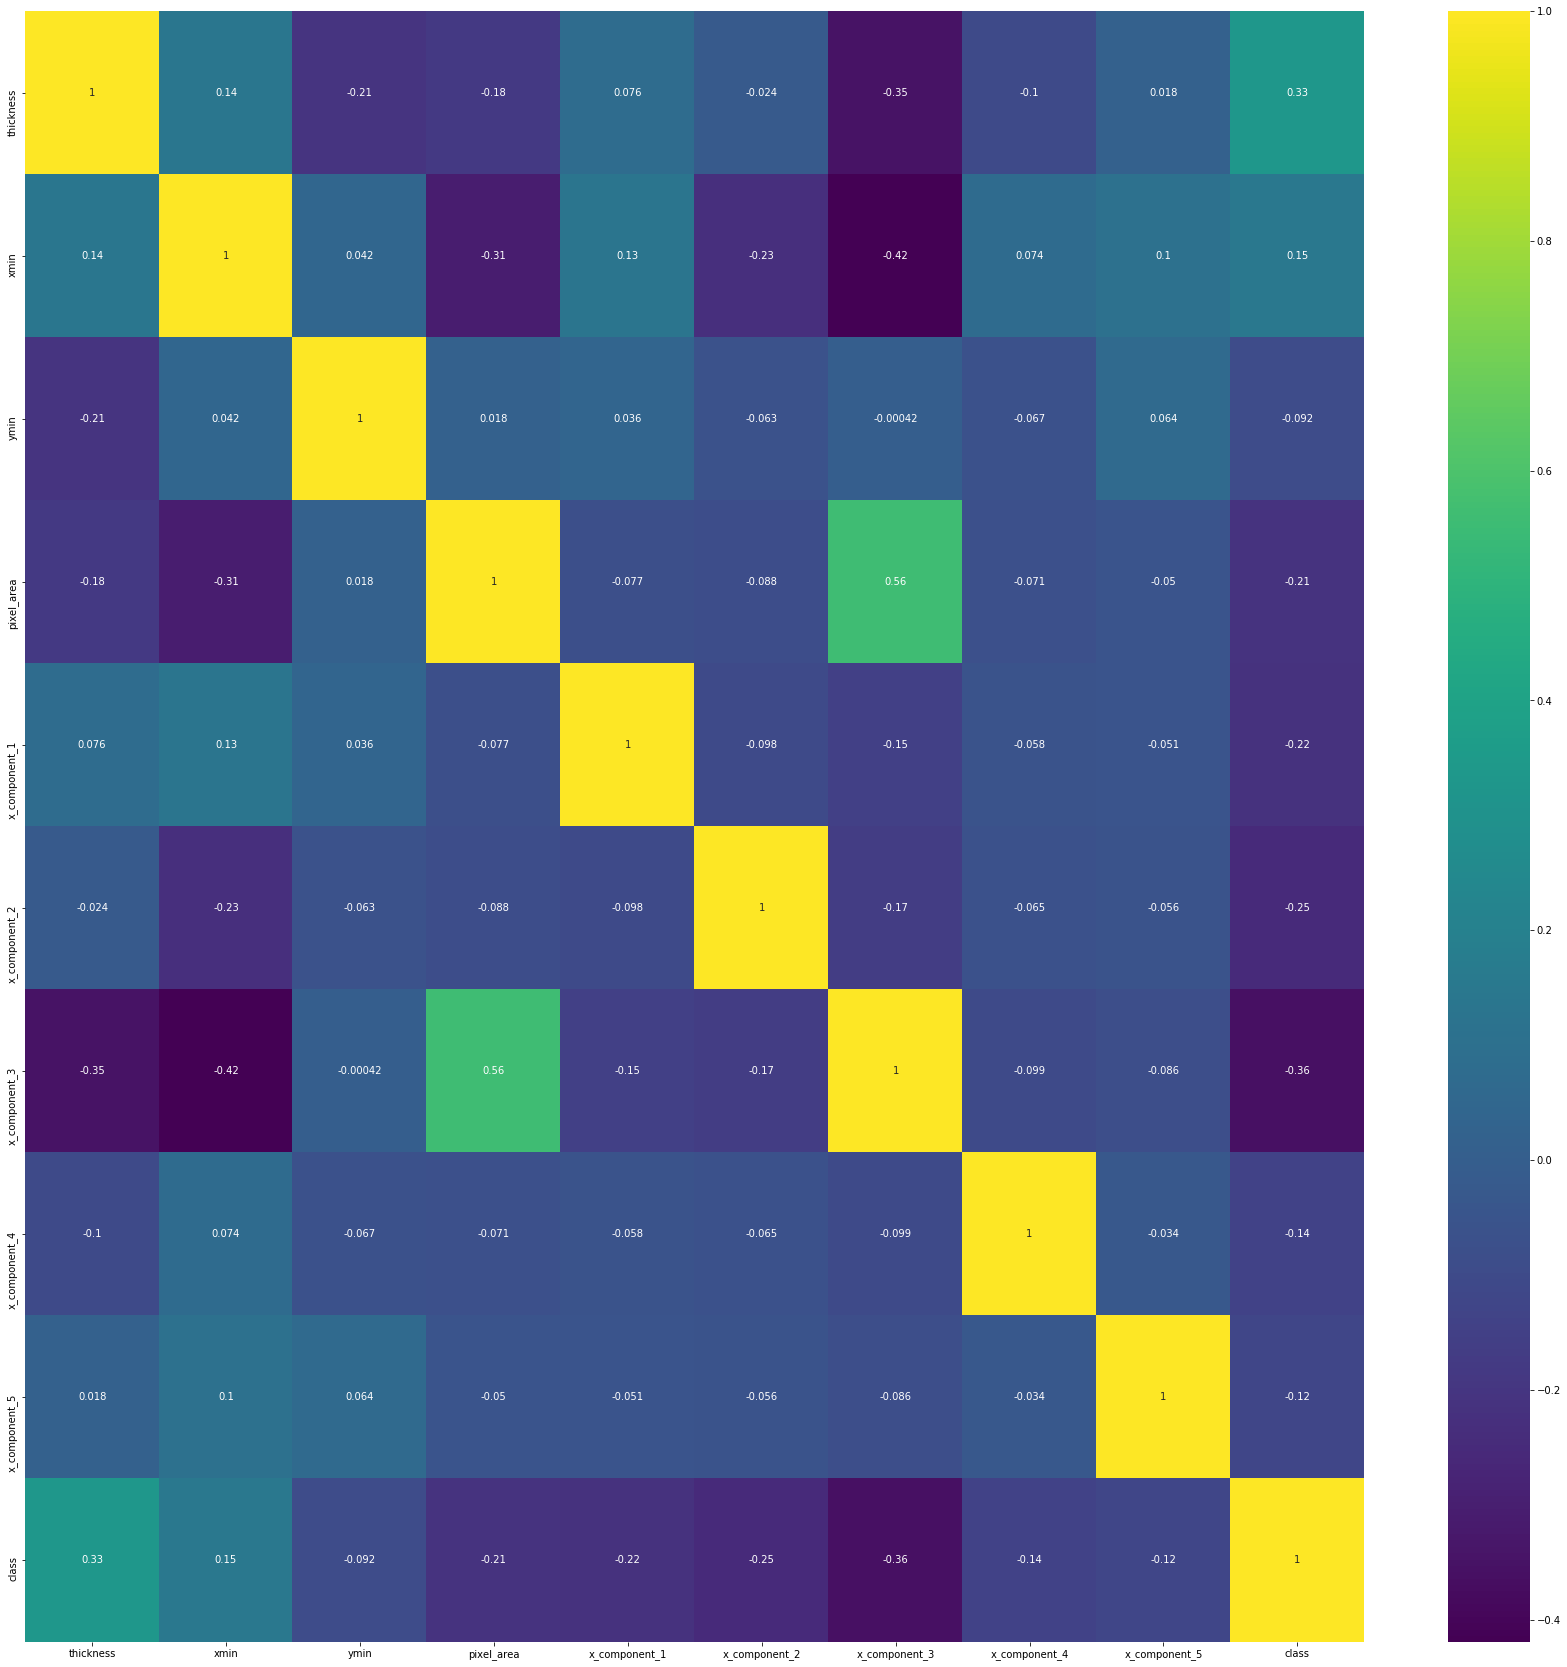

In [14]:
plt.figure(figsize = (30,30))
sns.heatmap(fdata.corr(),annot=True,cmap='viridis')

In [15]:
fdata.columns

Index(['thickness', 'xmin', 'ymin', 'pixel_area', 'x_component_1',
       'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5',
       'class'],
      dtype='object')

In [16]:
fea=['thickness', 'xmin', 'ymin', 'pixel_area', 'x_component_1',
       'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']
x_sc=fdata[fea]

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(x_sc)

In [18]:
X_train=X[0:1358]
X_test=X[1358:]
y_train=train['class']

In [39]:
from lightgbm import LGBMClassifier
classifier= LGBMClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               criterion='entropy', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=50, n_jobs=-1, num_leaves=31,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [36]:
y_pred = classifier.predict_proba(X_test)

In [37]:
y_pred

array([[0.99378278, 0.00621722],
       [0.20589201, 0.79410799],
       [0.99378278, 0.00621722],
       ...,
       [0.99378278, 0.00621722],
       [0.99378278, 0.00621722],
       [0.99011182, 0.00988818]])

In [38]:
sub=pd.DataFrame()
sub['1']=y_pred[:,0]
sub['2']=y_pred[:,1]
sub.to_excel("lgbm50 best.xlsx",index=False)